### Display Raw Data

In [16]:
import Modularized_Data_Processing as mdp
import mne
import glob

filepath = r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-N-1.2-11-2021_raw.fif.gz"

PATH1 = r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\\"
PATH2 = r"C:\Users\words\OneDrive - Regis University\laryngeal_bci\data\fifs\\"
PATH = PATH1
FILENAME1 = PATH + "BCIproject_trial-S5_raw.fif.gz"
FILENAME2 = PATH + "BCIproject_trial-S3_raw.fif.gz"
FILENAME3 = PATH + "BCIproject_trial-1.2-11-2021_raw.fif.gz"
S_FILES = [f for f in glob.glob(PATH + '*S*raw.fif.gz')]
N_FILES = [f for f in glob.glob(PATH + '*N*raw.fif.gz')]
NEW_N_FILES = [f for f in glob.glob(PATH + '*N-*raw.fif.gz')]
FILENAMES = S_FILES

#Load data
# data = mdp.load_data(filepath)

data = mdp.load_many_data(FILENAMES)

Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-S-1.3-4-2021_raw.fif.gz...
    Range : 0 ... 449998 =      0.000 ...   449.998 secs
Ready.
Reading 0 ... 449998  =      0.000 ...   449.998 secs...
Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-S-2.3-8-2021_raw.fif.gz...
    Range : 0 ... 449998 =      0.000 ...   449.998 secs
Ready.
Reading 0 ... 449998  =      0.000 ...   449.998 secs...
The length of raw_data is:2
Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transiti

In [17]:
data.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, CP1, CP2, FC1, FC2, O1, O2, F7, F8, Fz, Cz, T3, T4, P3, P4
 chs: 16 EEG
 custom_ref_applied: False
 dig: 19 items (3 Cardinal, 16 EEG)
 file_id: 4 items (dict)
 highpass: 5.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 16
 projs: []
 sfreq: 1000.0 Hz
>

In [18]:
sfreq = data.info['sfreq']
print("Sample freq (sfreq) is: " + str(sfreq) + " Hz")

Sample freq (sfreq) is: 1000.0 Hz


In [19]:
data.info.ch_names

['Fp1',
 'Fp2',
 'CP1',
 'CP2',
 'FC1',
 'FC2',
 'O1',
 'O2',
 'F7',
 'F8',
 'Fz',
 'Cz',
 'T3',
 'T4',
 'P3',
 'P4']

In [20]:
%matplotlib widget

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (1.651 sec)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

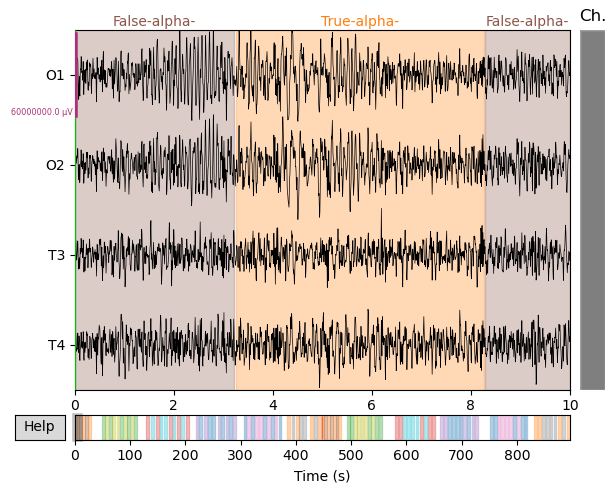

In [21]:
#display raw data

chns = data.info.ch_names

picks = ["O1", "O2", "T3", "T4"]

chn_idxs = []
for chn in picks:
    chn_idxs.append(chns.index(chn))

#apply the bandpass filter

low_fq = 5
hi_fq = 40

crpd_data = data.crop(2)
cd_fd_data = data.filter(5, 50)
    
cd_fd_data.plot(scalings="30", order=chn_idxs, n_channels=4, event_color={1 : "white"}) #How do I make this interactive; seems to work now

### Display Alpha-Waves on a Spectrogram

In [22]:
ants = [i["description"] for i in data.annotations]
novel_ants = []
for i in range(len(ants)):
    if ants[i] in ants:
        if ants[i] not in novel_ants:
            novel_ants.append(ants[i])
        continue
        
print(len(novel_ants))

14


In [34]:
epoch_type = "SSVEP"

f1_empty, f2 = mdp.get_epochs(epoch_type, data, nperseg=2000, noverlap=1800, channels=['O1', 'O2']) #f1_empty should be empty in the case of alpha waves (there are no false alpha wave trials); only look at f2

Used Annotations descriptions: ['False-SSVEP-']
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 5001 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['True-SSVEP-']
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 5001 original time points ...
0 bad epochs dropped
true_found is: True


In [35]:
f2

## Print True Trials

In [40]:
for z in range(len(f2.specs)):
    print("Annotation: " + "True-" + epoch_type + "-")
    mdp.plot_spectrogram(f2.ts[z], f2.fs[z], f2.specs[z])

Annotation: True-SSVEP-


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-SSVEP-


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-SSVEP-


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-SSVEP-


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-SSVEP-


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-SSVEP-


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-SSVEP-


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-SSVEP-


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-SSVEP-


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-SSVEP-


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Print False Trials

In [41]:
for z in range(len(f1.specs)):
    print("Annotation: " + "False-" + epoch_type + "-")
    mdp.plot_spectrogram(f1.ts[z], f1.fs[z], f1.specs[z])

NameError: name 'f1' is not defined